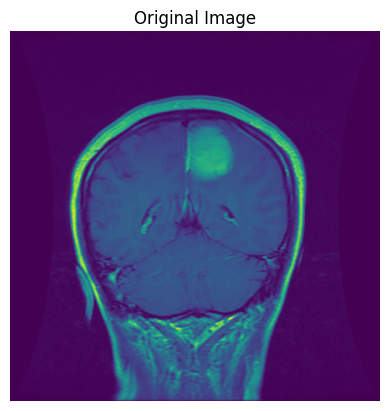

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

image_org = Image.open('/content/2993.png')

plt.imshow(image_org)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [ ]:
image_np = np.array(image_org)
image_np.shape

(512, 512, 4)

In [ ]:
pixels = image_np.reshape(-1, 4)

pixels_df = pd.DataFrame (pixels, columns=['R', 'G', 'B', 'A'])
pixels_df

,R,G,B,A
0,68,1,84,255
1,68,1,84,255
2,68,1,84,255
3,68,1,84,255
4,68,1,84,255
...,...,...,...,...
262139,68,1,84,255
262140,68,1,84,255
262141,68,1,84,255
262142,68,1,84,255


In [ ]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=3, n_init='auto')
clf.fit(pixels)

KMeans(n_clusters=3, n_init='auto')

In [ ]:
pd.DataFrame(clf.cluster_centers_, columns=['R', 'G', 'B', 'A'])

,R,G,B,A
0,58.246661,80.560674,137.371544,255.0
1,68.684446,5.338165,88.590436,255.0
2,45.915110,154.430121,130.323835,255.0


In [ ]:
pixels_df['label'] = clf.labels_
pixels_df

,R,G,B,A,label
0,68,1,84,255,1
1,68,1,84,255,1
2,68,1,84,255,1
3,68,1,84,255,1
4,68,1,84,255,1
...,...,...,...,...,...
262139,68,1,84,255,1
262140,68,1,84,255,1
262141,68,1,84,255,1
262142,68,1,84,255,1


In [ ]:
pixels_seg0 = clf.cluster_centers_[clf.labels_]
pd.DataFrame(pixels_seg0, columns=['R', 'G', 'B', 'A'])

,R,G,B,A
0,68.684446,5.338165,88.590436,255.0
1,68.684446,5.338165,88.590436,255.0
2,68.684446,5.338165,88.590436,255.0
3,68.684446,5.338165,88.590436,255.0
4,68.684446,5.338165,88.590436,255.0
...,...,...,...,...
262139,68.684446,5.338165,88.590436,255.0
262140,68.684446,5.338165,88.590436,255.0
262141,68.684446,5.338165,88.590436,255.0
262142,68.684446,5.338165,88.590436,255.0


In [ ]:
pixels_seg = np.clip(pixels_seg0.astype('uint8'), 0, 255)
pd.DataFrame(pixels_seg, columns=['R', 'G', 'B', 'A'])

,R,G,B,A
0,68,5,88,255
1,68,5,88,255
2,68,5,88,255
3,68,5,88,255
4,68,5,88,255
...,...,...,...,...
262139,68,5,88,255
262140,68,5,88,255
262141,68,5,88,255
262142,68,5,88,255


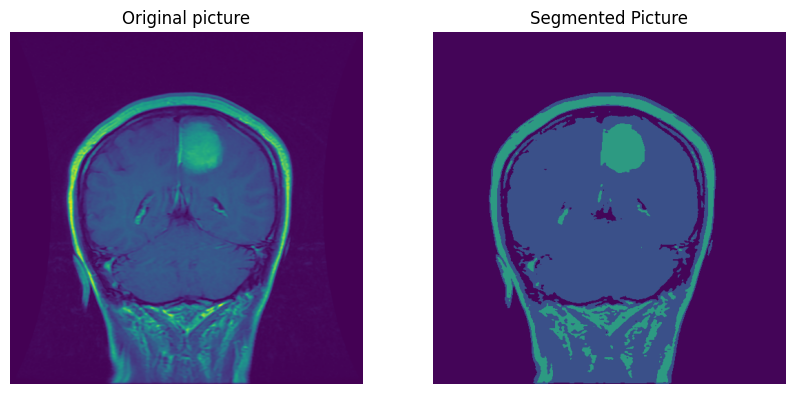

In [ ]:
image_seg = pixels_seg.reshape(image_np.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_org)
plt.title('Original picture')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_seg)
plt.title('Segmented Picture')
plt.axis('off')

plt.show()